# Lab1:Python

Question 1)
Afficher des nombres aleatoirement de 1,6

In [31]:
from random import randint as ran
print(ran(1,6))

1


Question 2)
Afficher des mot aleatoire d'une liste

In [32]:
from random import choice
print(choice(['sosmula','zillakami','omar','tt']))

omar


changing all image extenxion to png

In [161]:
import glob
from os import rename
from os.path import join

for p in glob.glob(r'pics/*'):
  rename(p, join(r'pics',p.split('\\')[1].split('.')[0]+'.png'))

Question 3)
Afficher des images aleatoirement

pics\eunfdj3.png


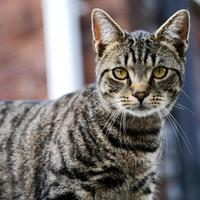

In [72]:
from os import listdir
from IPython.display import display,Image
from os.path import isfile, join

onlyfiles = [f for f in listdir(r'pics') if isfile(join(r'pics', f))]

print(join(r'pics',choice(onlyfiles)))
display(Image(join(r'pics',choice(onlyfiles))))

Question 4)
resize the pic

In [169]:
from PIL import Image
import glob


onlyfiles = glob.glob(r'pics/*')

basewidth = 200
for pic in onlyfiles:
    img = Image.open(pic)
    wpercent = (basewidth / float(img.size[0]))
    hsize = int((float(img.size[1]) * float(wpercent)))
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save(pic)

Question 5)
displaying only 1 pic at a time


 pics\obama.png


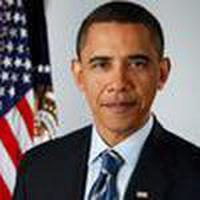

to quite click q :

 pics\eunfdj3.png


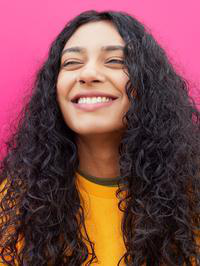

to quite click q :

 pics\1634394020670.png


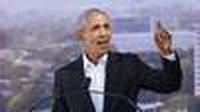

to quite click q :

 pics\Will-Smith-2.png


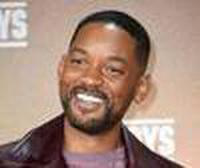

to quite click q :

 pics\zillakami.png


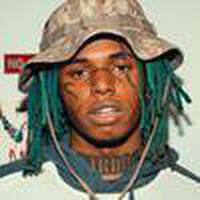

to quite click q :q


In [170]:
from os import listdir
from IPython.display import display,Image
from os.path import isfile, join
from random import choice


onlyfiles = [f for f in listdir(r'pics') if isfile(join(r'pics', f))]
s=''
while onlyfiles and s!='q':
    pic=choice(onlyfiles)
    print('\n',join(r'pics',pic))
    display(Image(join(r'pics',pic)))
    onlyfiles.remove(pic)
    s=input('to quite click q :')

# to install face_recognition
### conda install -c conda-forge face_recognition

locating a face in a pic

Bonnet_macaque_(Macaca_radiata)_Photograph_By_Shantanu_Kuveskar.png
the face is located inside the rectangle : [(26, 141, 78, 89)]


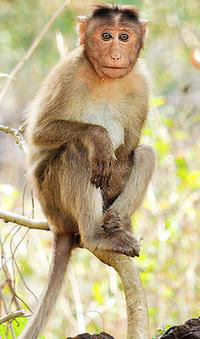

In [171]:
import face_recognition
from os import listdir
from IPython.display import display,Image
from os.path import isfile, join
# getting all the pics
onlyfiles = [f for f in listdir(r'pics') if isfile(join(r'pics', f))]
pic=choice(onlyfiles)
print(join(r'pics',pic).split("\\")[1])
#loading the image
image = face_recognition.load_image_file(join(r'pics',pic))
#locate the face
face_locations = face_recognition.face_locations(image)
print('the face is located inside the rectangle :',face_locations)
display(Image(join(r'pics',pic)))



drawing a rectangle in the image

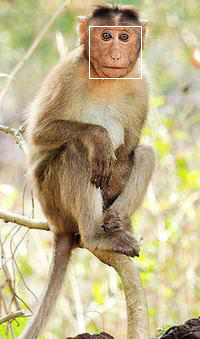

In [115]:
from PIL import Image,ImageDraw
from IPython.display import display

# Opens a image in RGB mode
image_pil = Image.open(join(r'pics',pic))
face_encoding=face_recognition.face_encodings(image)[0]
#image_pil=Image.fromarray(face_encoding[0])
draw=ImageDraw.Draw(image_pil)
#left top right bottom
#1 0 3 2
draw.rectangle(((face_locations[0][1],face_locations[0][0]),(face_locations[0][3], face_locations[0][2])))
display(image_pil)


face comparaison

['pics\\obama.png', 'pics\\obama2.png']
[True]
it's Obama


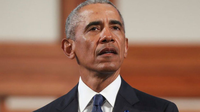

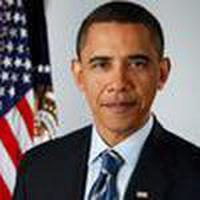

In [183]:
import face_recognition
from os import listdir
from IPython.display import display,Image
from os.path import isfile, join
from random import choice
import glob

list=[]
list=glob.glob(r'pics\*')

newlist = [x for x in list if "obama" in x]

print(newlist)

pathSImg=newlist[0]
pathImg=choice(list)

Img1 = face_recognition.load_image_file(pathSImg)
Img2 = face_recognition.load_image_file(pathImg)

encoding1=face_recognition.face_encodings(Img1)
encoding2=face_recognition.face_encodings(Img2)

if len(encoding1)!=0 and len(encoding2)!=0:
    result = face_recognition.compare_faces([encoding2[0]], encoding1[0])
    print(result)
    if  result[0] == True:
        print("""it's Obama""")
    else:
        print("""unknown""")
else:
    print('no face detected')


display(Image(pathImg),Image(pathSImg))




detect gender

## conda install -c conda-forge face_recognition

In [56]:
import cv2
import numpy as np

# The gender model architecture

GENDER_MODEL = 'deploy_gender.prototxt'

# The gender model pre-trained weights
GENDER_PROTO = 'gender_net.caffemodel'
# Each Caffe Model impose the shape of the input image also image preprocessing is required like mean
# substraction to eliminate the effect of illunination changes
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
# Represent the gender classes
GENDER_LIST = ['Male', 'Female']

FACE_PROTO = "deploy.prototxt.txt"

FACE_MODEL = "res10_300x300_ssd_iter_140000_fp16.caffemodel"


In [57]:
# load face Caffe model
face_net = cv2.dnn.readNetFromCaffe(FACE_PROTO, FACE_MODEL)
# Load gender prediction model
gender_net = cv2.dnn.readNetFromCaffe(GENDER_MODEL, GENDER_PROTO)
def get_faces(frame, confidence_threshold=0.5):
    # convert the frame into a blob to be ready for NN input
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104, 177.0, 123.0))
    # set the image as input to the NN
    face_net.setInput(blob)
    # perform inference and get predictions
    output = np.squeeze(face_net.forward())
    # initialize the result list
    faces = []
    # Loop over the faces detected
    for i in range(output.shape[0]):
        confidence = output[i, 2]
        if confidence > confidence_threshold:
            box = output[i, 3:7] * \
                np.array([frame.shape[1], frame.shape[0],
                         frame.shape[1], frame.shape[0]])
            # convert to integers
            start_x, start_y, end_x, end_y = box.astype(np.int)
            # widen the box a little
            start_x, start_y, end_x, end_y = start_x - \
                10, start_y - 10, end_x + 10, end_y + 10
            start_x = 0 if start_x < 0 else start_x
            start_y = 0 if start_y < 0 else start_y
            end_x = 0 if end_x < 0 else end_x
            end_y = 0 if end_y < 0 else end_y
            # append to our list
            faces.append((start_x, start_y, end_x, end_y))
    return faces


In [59]:
def display_img(title, img):
    """Displays an image on screen and maintains the output until the user presses a key"""
    # Display Image on screen
    cv2.imshow(title, img)
    # Mantain output until user presses a key
    cv2.waitKey(0)
    # Destroy windows when user presses a key
    cv2.destroyAllWindows()
    
def get_optimal_font_scale(text, width):
    """Determine the optimal font scale based on the hosting frame width"""
    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1

# from: https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    return cv2.resize(image, dim, interpolation = inter)

def predict_gender(input_path: str):
    """Predict the gender of the faces showing in the image"""
    # Read Input Image
    img = cv2.imread(input_path)
    # resize the image, uncomment if you want to resize the image
    # img = cv2.resize(img, (frame_width, frame_height))
    # Take a copy of the initial image and resize it
    frame = img.copy()
    if frame.shape[1] > frame_width:
        frame = image_resize(frame, width=frame_width)
    # predict the faces
    faces = get_faces(frame)
    # Loop over the faces detected
    # for idx, face in enumerate(faces):
    for i, (start_x, start_y, end_x, end_y) in enumerate(faces):
        face_img = frame[start_y: end_y, start_x: end_x]
        # image --> Input image to preprocess before passing it through our dnn for classification.
        # scale factor = After performing mean substraction we can optionally scale the image by some factor. (if 1 -> no scaling)
        # size = The spatial size that the CNN expects. Options are = (224*224, 227*227 or 299*299)
        # mean = mean substraction values to be substracted from every channel of the image.
        # swapRB=OpenCV assumes images in BGR whereas the mean is supplied in RGB. To resolve this we set swapRB to True.
        blob = cv2.dnn.blobFromImage(image=face_img, scalefactor=1.0, size=(
            227, 227), mean=MODEL_MEAN_VALUES, swapRB=False, crop=False)
        # Predict Gender
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        i = gender_preds[0].argmax()
        gender = GENDER_LIST[i]
        gender_confidence_score = gender_preds[0][i]
        # Draw the box
        label = "{}-{:.2f}%".format(gender, gender_confidence_score*100)
        print(label)
        yPos = start_y - 15
        while yPos < 15:
            yPos += 15
        # get the font scale for this image size
        optimal_font_scale = get_optimal_font_scale(label,((end_x-start_x)+25))
        box_color = (255, 0, 0) if gender == "Male" else (147, 20, 255)
        cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), box_color, 2)
        # Label processed image
        cv2.putText(frame, label, (start_x, yPos),
                    cv2.FONT_HERSHEY_SIMPLEX, optimal_font_scale, box_color, 2)

        # Display processed image
    display_img("Gender Estimator", frame)
    # uncomment if you want to save the image
    cv2.imwrite("output.jpg", frame)
    # Cleanup
    cv2.destroyAllWindows()